In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\saads\OneDrive\Desktop\Diamonds - Dataset\diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df = df.drop(df.columns[0], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#Replacing cut values as Fair=1, Good=2, Very Good=3, Premium=4, Ideal=5 since they have ordinal relationship.
df['cut'] = df['cut'].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ['1', '2', '3', '4', '5'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
#Similarly, replacing values for Color using Integer Encoding as they have ordinal relationship.
#J=1, I=2, H=3, G=4, F=5, E=6, D=7.
df['color'] = df['color'].replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'], ['1', '2', '3', '4', '5', '6', '7'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
#Finally replacing Clarity with integerts as it has ordinal relationship.
#I1(worst)=1, SI2=2, SI1=3, VS2=4, VS1=5, VVS2=6, VVS1=7, IF(best)=8
df['clarity'] = df['clarity'].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], ['1', '2', '3', '4', '5', '6', '7', '8'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
#Converting every non-float variable to float
df['cut'] = df['cut'].astype(float)
df['color'] = df['color'].astype(float)
df['clarity'] = df['clarity'].astype(float)
df['price'] = df['price'].astype(float)
print(df.dtypes)
df.describe()

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: >

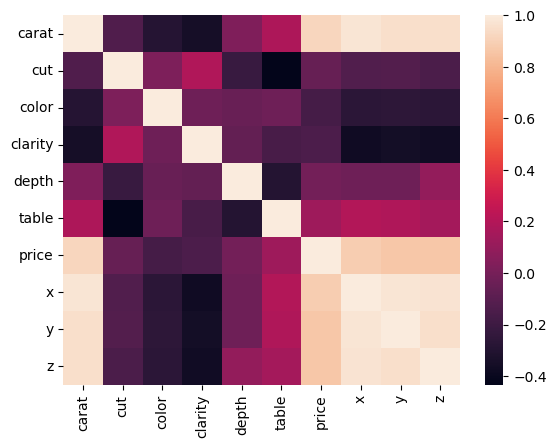

In [11]:
#Data visualization for Regression Analysis
sns.heatmap(df.corr())

Text(0, 0.5, 'Count')

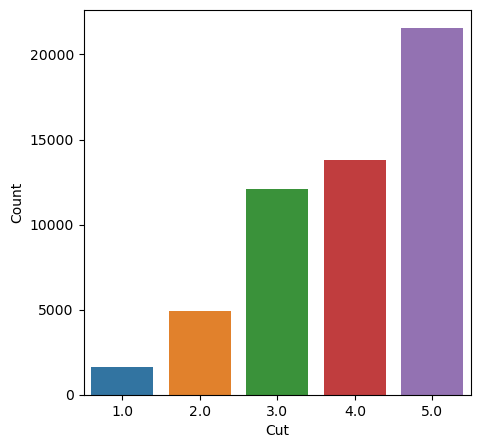

In [12]:
plt.figure(figsize=(5, 5))
sns.countplot(x='cut', data=df)
plt.xlabel('Cut')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

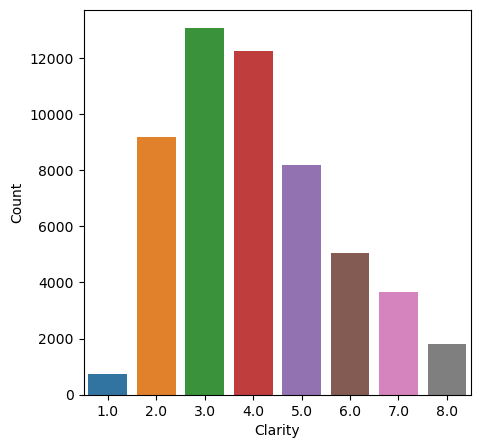

In [13]:
plt.figure(figsize=(5, 5))
sns.countplot(x='clarity', data=df)
plt.xlabel('Clarity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

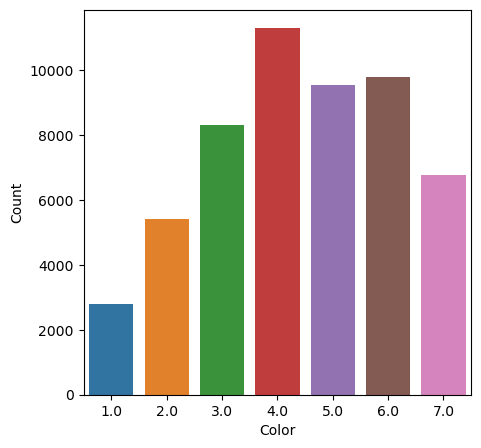

In [14]:
plt.figure(figsize=(5, 5))
sns.countplot(x='color', data=df)
plt.xlabel('Color')
plt.ylabel('Count')

In [15]:
#Removing Price values, as it is used in calculating weights via AHP method.
df = df.drop(df.columns[6], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,5.0,6.0,2.0,61.5,55.0,3.95,3.98,2.43
1,0.21,4.0,6.0,3.0,59.8,61.0,3.89,3.84,2.31
2,0.23,2.0,6.0,5.0,56.9,65.0,4.05,4.07,2.31
3,0.29,4.0,2.0,4.0,62.4,58.0,4.20,4.23,2.63
4,0.31,2.0,1.0,2.0,63.3,58.0,4.34,4.35,2.75


In [16]:
#Normalizing the Data
df_norm = df/np.sqrt(np.power(df,2).sum(axis=0))
df_norm.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.001067,0.005302,0.005470,0.001969,0.004287,0.004118,0.002912,0.002931,0.002900
1,0.000974,0.004241,0.005470,0.002954,0.004169,0.004568,0.002868,0.002828,0.002756
2,0.001067,0.002121,0.005470,0.004923,0.003966,0.004867,0.002986,0.002997,0.002756
3,0.001345,0.004241,0.001823,0.003938,0.004350,0.004343,0.003097,0.003115,0.003138
4,0.001438,0.002121,0.000912,0.001969,0.004413,0.004343,0.003200,0.003203,0.003281


In [17]:
#Defining weights based on AHP method
w = 0.18, 0.04, 0.015, 0.02, 0.02, 0.06, 0.22, 0.22, 0.225

In [18]:
#Defining and Calculating weighted normal matrix
df_norm_w = df_norm * w
df_norm_w.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.000192,0.000212,0.000082,0.000039,0.000086,0.000247,0.000641,0.000645,0.000652
1,0.000175,0.000170,0.000082,0.000059,0.000083,0.000274,0.000631,0.000622,0.000620
2,0.000192,0.000085,0.000082,0.000098,0.000079,0.000292,0.000657,0.000659,0.000620
3,0.000242,0.000170,0.000027,0.000079,0.000087,0.000261,0.000681,0.000685,0.000706
4,0.000259,0.000085,0.000014,0.000039,0.000088,0.000261,0.000704,0.000705,0.000738


In [19]:
#Identifying positive and negative ideals for TOPSIS
positive_ideal = df_norm_w.max()
negative_ideal = df_norm_w.min()
print(positive_ideal, negative_ideal)

carat      0.004184
cut        0.000212
color      0.000096
clarity    0.000158
depth      0.000110
table      0.000427
x          0.001742
y          0.009542
z          0.008538
dtype: float64 carat      0.000167
cut        0.000042
color      0.000014
clarity    0.000020
depth      0.000060
table      0.000193
x          0.000000
y          0.000000
z          0.000000
dtype: float64


In [20]:
#Doing seperation measurements
#Positive idea
SM_P = np.sqrt(np.power(df_norm_w - positive_ideal, 2).sum(axis=1))
#Negative idea
SM_N = np.sqrt(np.power(df_norm_w - negative_ideal, 2).sum(axis=1))

In [21]:
print(SM_N)

0        0.001136
1        0.001095
2        0.001129
3        0.001210
4        0.001246
           ...   
53935    0.001689
53936    0.001692
53937    0.001673
53938    0.001820
53939    0.001733
Length: 53940, dtype: float64


In [22]:
#Ranking each specimen based on the criteria and weights
final_rank = SM_N /(SM_N + SM_P)

In [23]:
print(final_rank)

0        0.082740
1        0.079775
2        0.082233
3        0.088171
4        0.090870
           ...   
53935    0.122893
53936    0.123177
53937    0.121816
53938    0.132306
53939    0.126092
Length: 53940, dtype: float64


In [24]:
#Sorting all the specimens based on their ranking
final_rank.sort_values(ascending=False)

24067    0.592503
48410    0.475036
49189    0.368909
27415    0.329654
27630    0.309142
           ...   
26243    0.060715
15951    0.056486
11963    0.048372
49557    0.031733
49556    0.031733
Length: 53940, dtype: float64